
1) Fazer o teste de normalidade. 

2) Testar a estacionariedade.

3) Plotar os dados, a acf e pacf. 

4) Decompor a série. 

5) Escolher o modelo mais adequado, através dos critérios (Ver o meu TCC as fórmulas e os comandos). 

6) Testar a normalidade dos resíduos através de gráficos e testes. 

7) Os coeficientes estimados do modelo escolhido. 

8) Fazer a previsão 6 passos a frente (Ver os comandos no meu TCC). 

9) Comparar os valores reais e os previstos,


In [1]:
install.packages("nortest")
install.packages("tseries")
install.packages("ggplot2")

library(ggplot2)
library(tseries)
library(nortest)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
obitos = read.csv("anomes_ob.csv")
hospt = read.csv("anomes_hospt.csv")

In [3]:
obitos <- ts(obitos[,2])
hospt <- ts(hospt[,2])

In [4]:
ts_obitos = ts(obitos, start=c(2008,10), frequency=12)
ts_hospt = ts(obitos, start=c(2008,10), frequency=12)

### 1) Fazer o teste de normalidade. 


In [5]:
lillie.test(obitos)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  obitos
D = 0.099045, p-value = 0.002317


In [6]:
lillie.test(hospt)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  hospt
D = 0.15217, p-value = 2.563e-08


### 2) Testar a estacionariedade.

In [7]:
adf.test(obitos, k = 0)

Warning message in adf.test(obitos, k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  obitos
Dickey-Fuller = -9.1631, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [8]:
adf.test(hospt, k = 0)

Warning message in adf.test(hospt, k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  hospt
Dickey-Fuller = -4.0431, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


### 3) Plotar os dados, a acf e pacf.

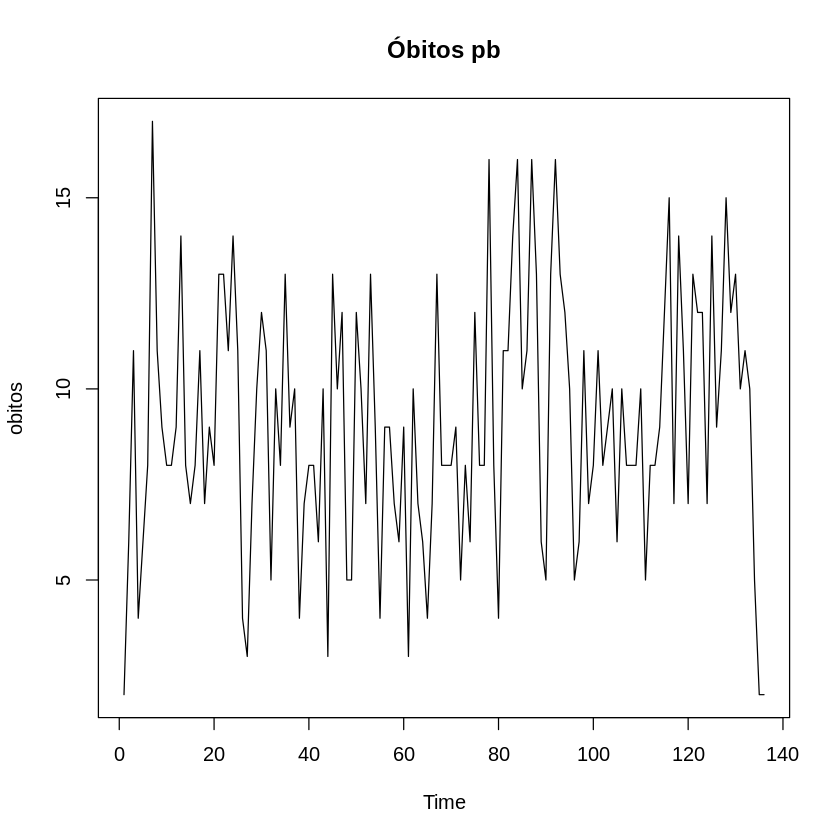

In [9]:
plot.ts(obitos,main="Óbitos pb")    

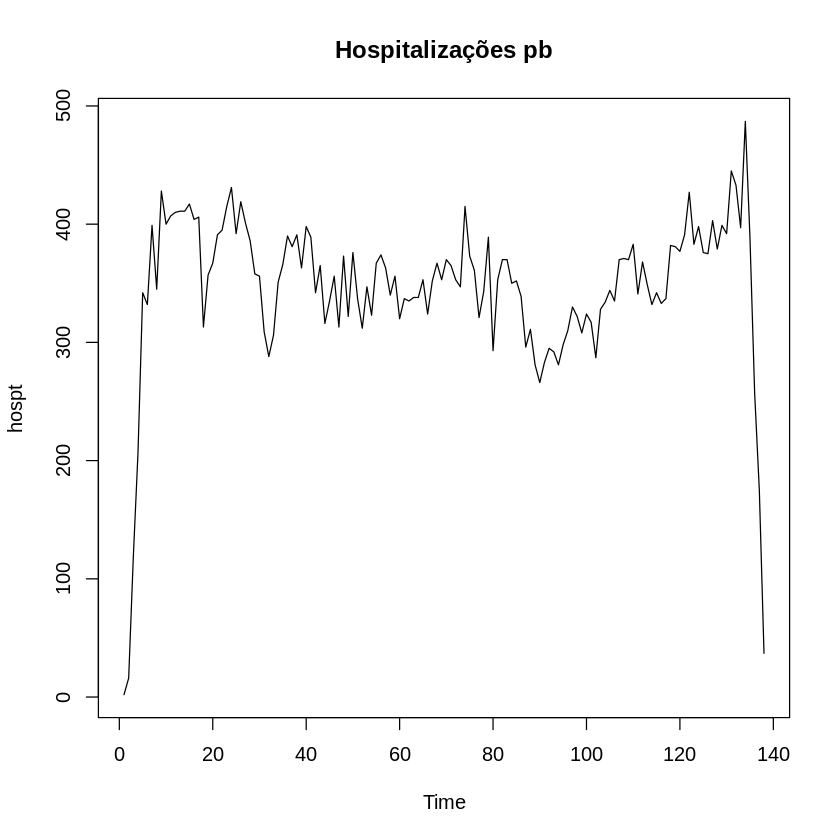

In [10]:
plot.ts(hospt,main="Hospitalizações pb")    

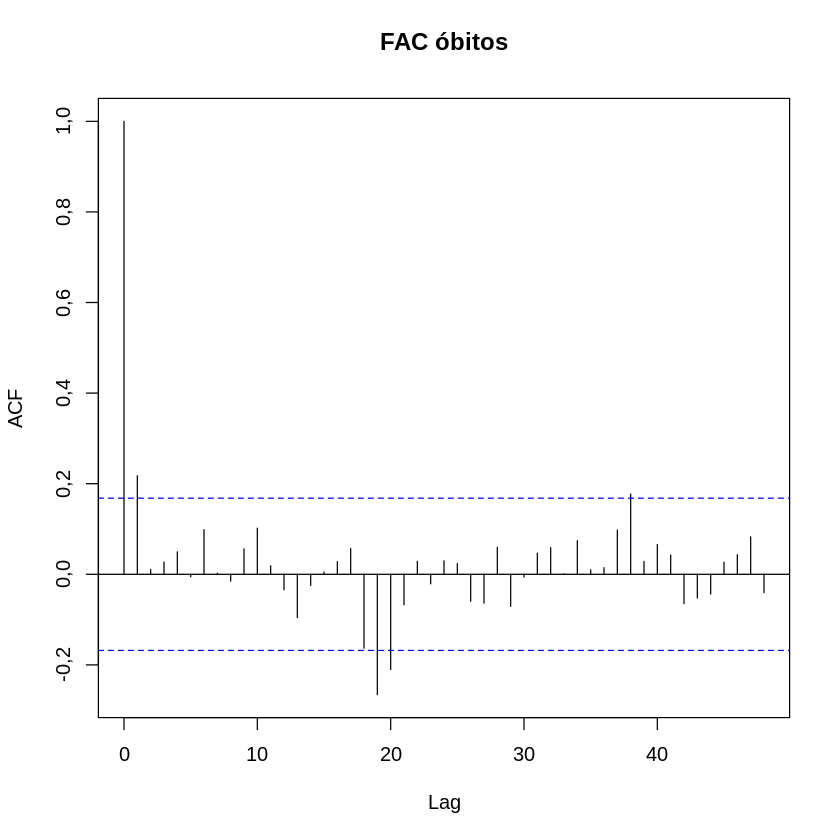

In [11]:
acf(obitos,lag=48,main="FAC óbitos")

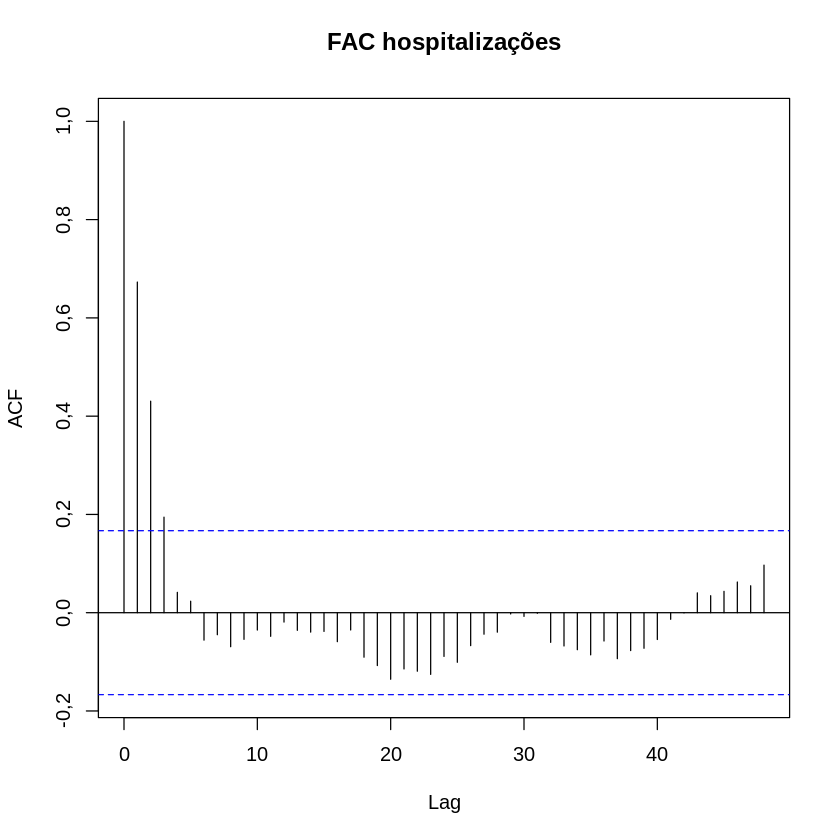

In [12]:
acf(hospt,lag=48,main="FAC hospitalizações")

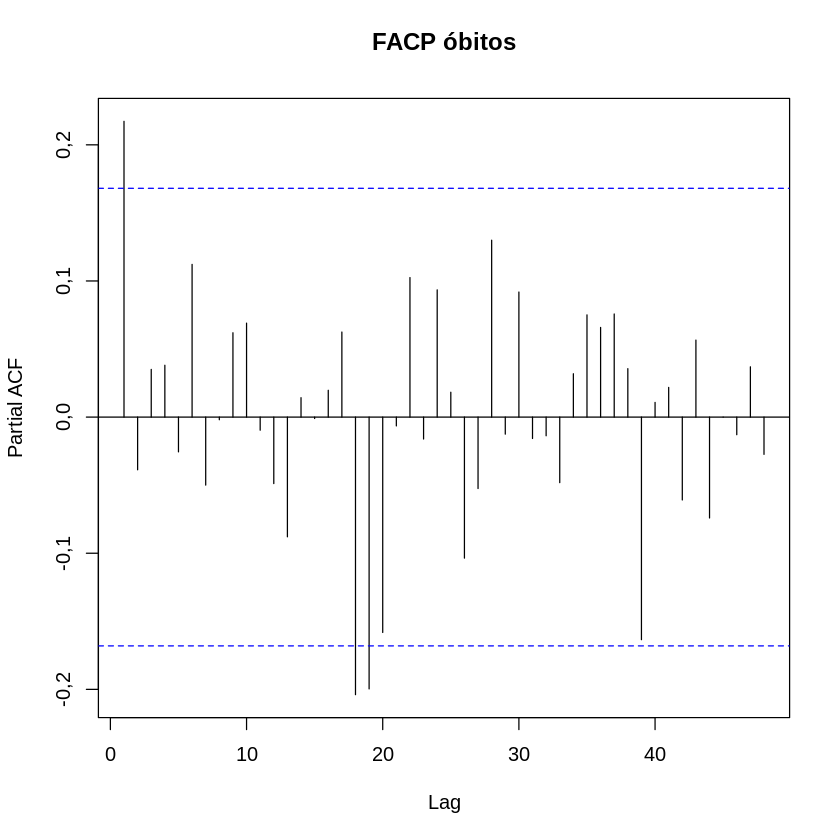

In [13]:
pacf(obitos,lag=48,main="FACP óbitos")

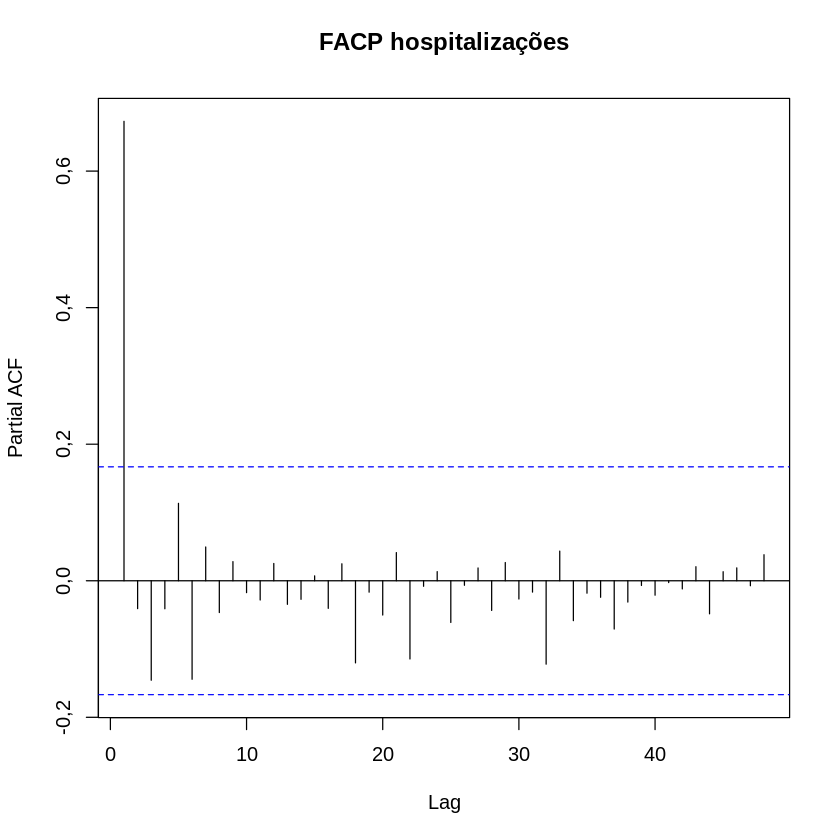

In [14]:
pacf(hospt,lag=48,main="FACP hospitalizações")

### 4) Decompor a série.

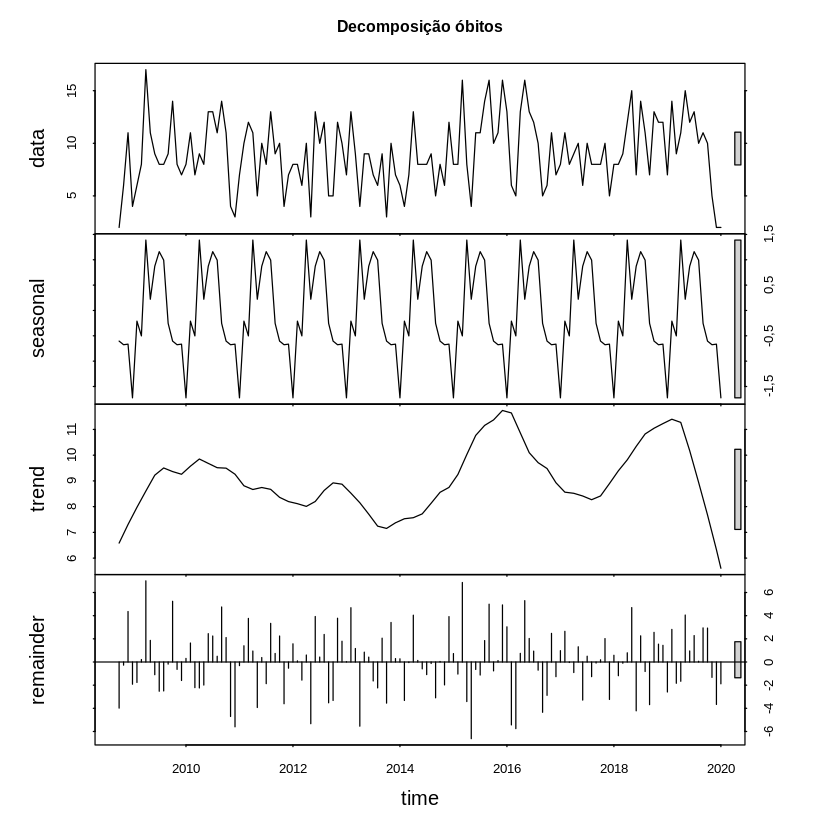

In [15]:
ajuste.stl_obitos <- stl(ts_obitos, "per")
plot(ajuste.stl_obitos, main="Decomposição óbitos")

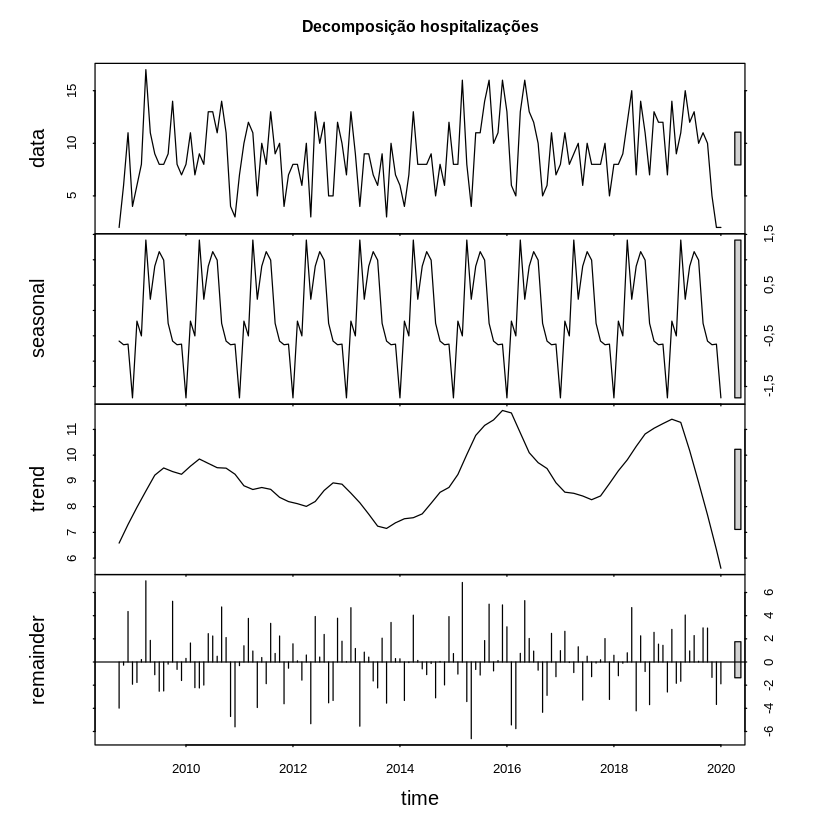

In [16]:
ajuste.stl_hospt <- stl(ts_hospt, "per")
plot(ajuste.stl_hospt, main="Decomposição hospitalizações")

### 5) Escolher o modelo mais adequado, através dos critérios (Ver o meu TCC as fórmulas e os comandos).
### 7) Os coeficientes estimados do modelo escolhido.

In [17]:
ajuste.sarima_obitos = arima(obitos,order=c(3,0,5))
ajuste.sarima_obitos

Warning message in sqrt(diag(x$var.coef)):
“NaNs produzidos”


Call:
arima(x = obitos, order = c(3, 0, 5))

Coefficients:
          ar1     ar2     ar3     ma1      ma2      ma3     ma4     ma5
      -0,5648  0,5660  0,3474  0,8155  -0,4139  -0,4608  0,0056  0,0206
s.e.      NaN  0,4454     NaN     NaN   0,3692      NaN     NaN     NaN
      intercept
         9,0167
s.e.     0,4067

sigma^2 estimated as 10,07:  log likelihood = -350,1,  aic = 720,21

In [18]:
ajuste.sarima_hospt = arima(hospt,order=c(1,0,3))
ajuste.sarima_hospt


Call:
arima(x = hospt, order = c(1, 0, 3))

Coefficients:
         ar1     ma1     ma2     ma3  intercept
      0,8661  0,0400  0,3692  0,2034   309,1123
s.e.  0,0899  0,1149  0,0831  0,1040    42,6550

sigma^2 estimated as 1353:  log likelihood = -694,59,  aic = 1401,18

### 8) Fazer a previsão 6 passos a frente (Ver os comandos no meu TCC).
### 9) Comparar os valores reais e os previstos.

In [19]:
obitos6 = obitos[1:66]
obitos6 = ts(obitos6, start=c(2008,10), frequency=12)
ajuste.sarima_obitos6 = arima(obitos6,order=c(3,0,5))
pacc_obitos = predict(ajuste.sarima_obitos6, 6)
obitos_reais6 <- obitos[67:72]
obitos_prev6 <- pacc_obitos$pred


hospt6 = hospt[1:66]
hospt6 = ts(hospt6, start=c(2008,10), frequency=12)
ajuste.sarima_hospt6 = arima(hospt6,order=c(1,0,4))
pacc_hospt = predict(ajuste.sarima_hospt6, 6)
hospt_reais6 <- hospt[67:72]
hospt_prev6 <- pacc_hospt$pred

In [20]:
h_obitos = 6
C1_obitos = sum(obitos_reais6) - sum(obitos_prev6)
C2_obitos = ((sum(obitos_reais6) - sum(obitos_prev6)) / sum(obitos_reais6)) * 100
C3_obitos = (1/h_obitos) * sum((obitos_reais6 - obitos_prev6) ^ 2)
C4_obitos = (1/h_obitos) * sum(abs(obitos_reais6 - obitos_prev6))


h_hospt = 6
C1_hospt = sum(hospt_reais6) - sum(hospt_prev6)
C2_hospt = ((sum(hospt_reais6) - sum(hospt_prev6)) / sum(hospt_reais6)) * 100
C3_hospt = (1/h_hospt) * sum((hospt_reais6 - hospt_prev6) ^ 2)
C4_hospt = (1/h_hospt) * sum(abs(hospt_reais6 - hospt_prev6))

In [21]:
pacc_obitos$pred + 1.96*pacc_obitos$se
pacc_obitos$pred - 1.96*pacc_obitos$se


pacc_hospt$pred + 1.96*pacc_hospt$se
pacc_hospt$pred - 1.96*pacc_hospt$se

ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. rep

### 6) Testar a normalidade dos resíduos através de gráficos e testes.

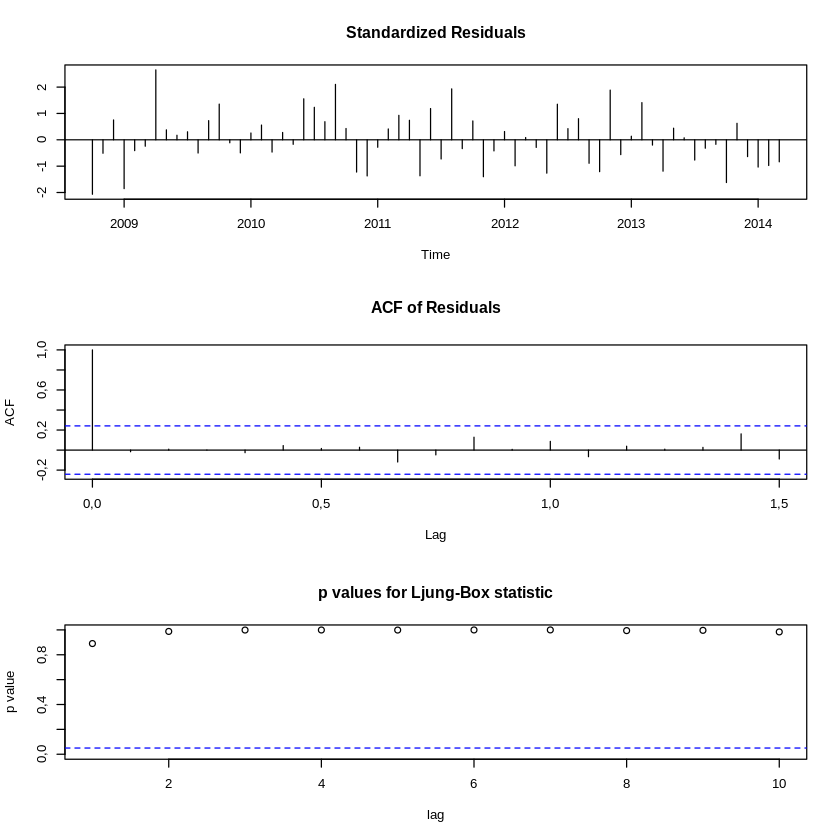

In [22]:
tsdiag(ajuste.sarima_obitos6)

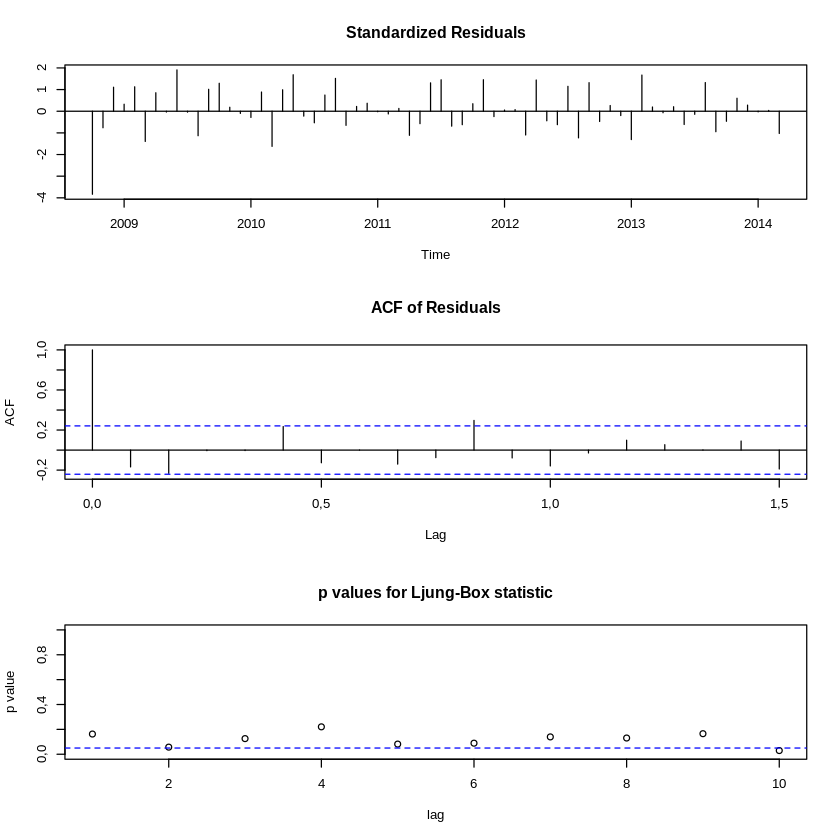

In [23]:
tsdiag(ajuste.sarima_hospt6)

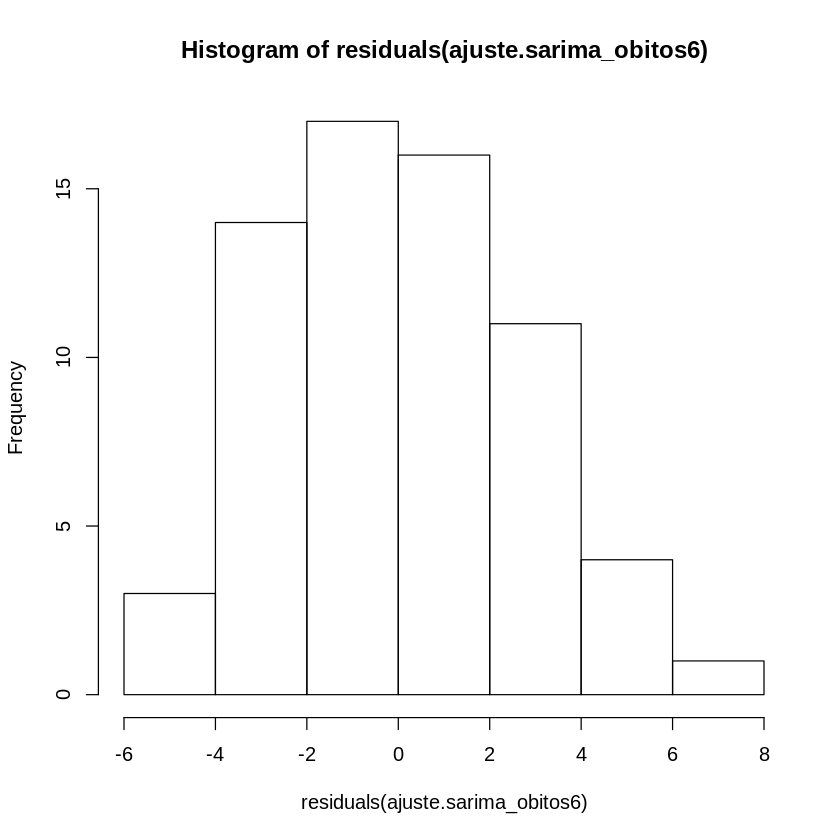

In [24]:
hist(residuals(ajuste.sarima_obitos6))

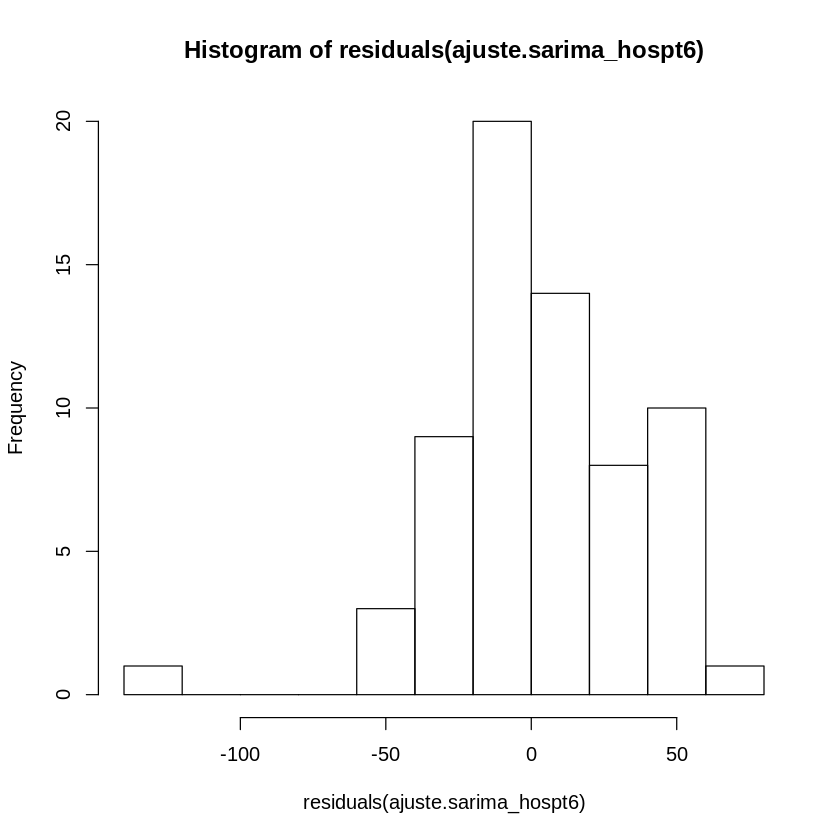

In [25]:
hist(residuals(ajuste.sarima_hospt6))

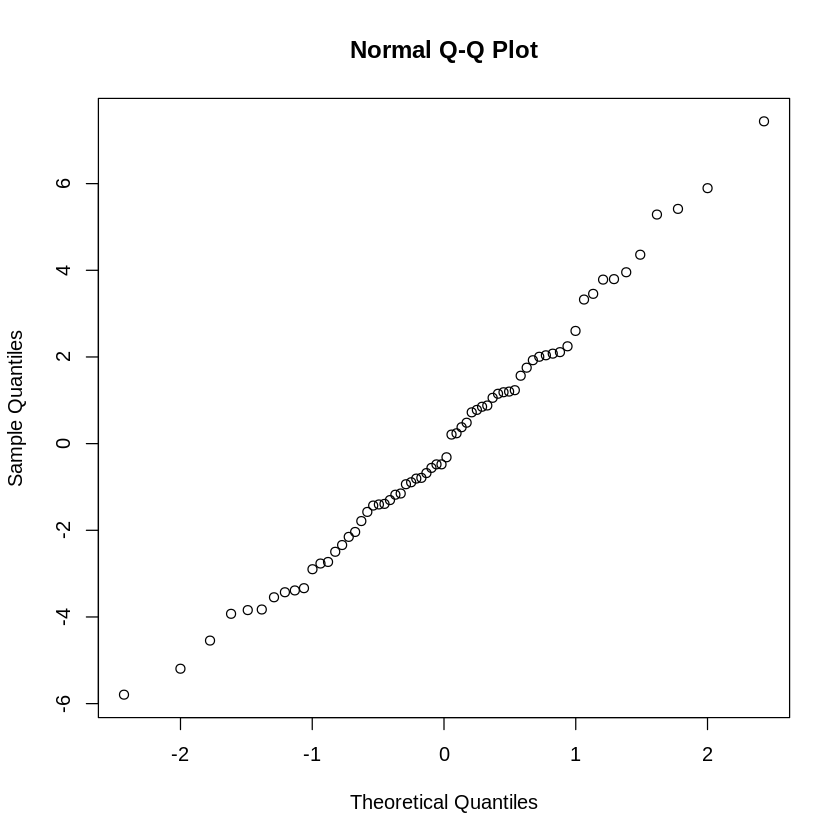

In [26]:
qqnorm(residuals(ajuste.sarima_obitos6))

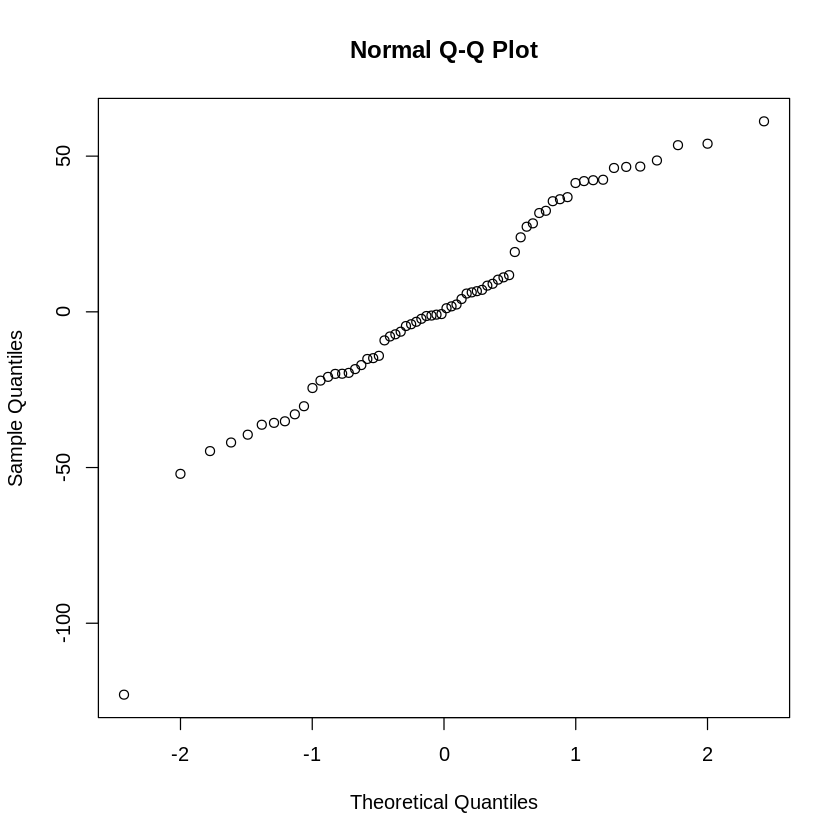

In [27]:
qqnorm(residuals(ajuste.sarima_hospt6))

In [28]:
lillie.test(residuals(ajuste.sarima_obitos6))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(ajuste.sarima_obitos6)
D = 0,067238, p-value = 0,6487


In [29]:
lillie.test(residuals(ajuste.sarima_hospt6))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  residuals(ajuste.sarima_hospt6)
D = 0,081919, p-value = 0,3328
